 Business Understanding

The percentage of total CHD events occurring in the population with established CHD was approximately 43% in both men and women, for CHD death 55% and 51%, and for nonfatal MI 35% and 36%, respectively. In those with established CHD 30% had more than 1 recurrent event. Therefore, we choose the cardiac dataset to predict the factors that are related to cardiac events, like hypertention, smoking, cholesterol among others factors. We will analize the outcome of cardiac disease(Miocardial infartion) as yes or not events.

In [1]:
# now let's read in the same data using pandas to save it as a dataframe also inport numpy to manipulate the data
import pandas as pd
import numpy as np

df = pd.read_csv("cardio_train.csv", sep=';') # read in the csv file
print(df)

          id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
0          0  18393       2     168    62.0    110     80            1     1   
1          1  20228       1     156    85.0    140     90            3     1   
2          2  18857       1     165    64.0    130     70            3     1   
3          3  17623       2     169    82.0    150    100            1     1   
4          4  17474       1     156    56.0    100     60            1     1   
...      ...    ...     ...     ...     ...    ...    ...          ...   ...   
69995  99993  19240       2     168    76.0    120     80            1     1   
69996  99995  22601       1     158   126.0    140     90            2     2   
69997  99996  19066       2     183   105.0    180     90            3     1   
69998  99998  22431       1     163    72.0    135     80            1     2   
69999  99999  20540       1     170    72.0    120     80            2     1   

       smoke  alco  active  cardio  
0 

In [2]:
print (df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB
None


In [3]:
df.describe() 

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
n= df.isna().sum()
n

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [5]:
df.duplicated(subset=None, keep='first')

0        False
1        False
2        False
3        False
4        False
         ...  
69995    False
69996    False
69997    False
69998    False
69999    False
Length: 70000, dtype: bool

In [6]:
#Histogram charts, to look at the distribution of the values in the column to investigate for outliers
import seaborn as sns
sns.set_style('whitegrid')
df_num = df.select_dtypes(include=['float64'])
df.hist(figsize =(14,12))

/Users/fabiosavorgnan/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'gender'}>,
        <AxesSubplot:title={'center':'height'}>],
       [<AxesSubplot:title={'center':'weight'}>,
        <AxesSubplot:title={'center':'ap_hi'}>,
        <AxesSubplot:title={'center':'ap_lo'}>,
        <AxesSubplot:title={'center':'cholesterol'}>],
       [<AxesSubplot:title={'center':'gluc'}>,
        <AxesSubplot:title={'center':'smoke'}>,
        <AxesSubplot:title={'center':'alco'}>,
        <AxesSubplot:title={'center':'active'}>],
       [<AxesSubplot:title={'center':'cardio'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

In [7]:
# Selected column to look for outliers
dfs= df[["age", "height", "weight", "ap_hi", "ap_lo"]]
dfs

,age,height,weight,ap_hi,ap_lo
0,18393,168,62.0,110,80
1,20228,156,85.0,140,90
2,18857,165,64.0,130,70
3,17623,169,82.0,150,100
4,17474,156,56.0,100,60
...,...,...,...,...,...
69995,19240,168,76.0,120,80
69996,22601,158,126.0,140,90
69997,19066,183,105.0,180,90
69998,22431,163,72.0,135,80


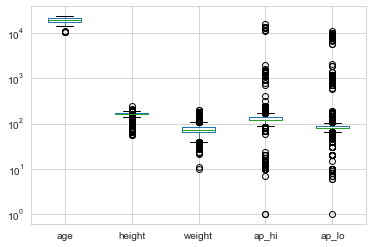

In [8]:
# Box plot of the diferents variables to gain more general information of the distribution values in the variables
ax = dfs.boxplot()
ax.set_yscale('log')

In [9]:
#Let exxamen the height, weight and blood pressure
dfhw= df[["height", "weight","ap_hi", "ap_lo"]]
dfhw

dfbp= dfhw[np.abs(dfhw -dfhw.mean()) <= (3*dfhw.std())]
dfhw
dfhw.describe() 

,height,weight,ap_hi,ap_lo
count,70000.000000,70000.000000,70000.000000,70000.000000
mean,164.359229,74.205690,128.817286,96.630414
std,8.210126,14.395757,154.011419,188.472530
min,55.000000,10.000000,-150.000000,-70.000000
25%,159.000000,65.000000,120.000000,80.000000
50%,165.000000,72.000000,120.000000,80.000000
75%,170.000000,82.000000,140.000000,90.000000
max,250.000000,200.000000,16020.000000,11000.000000


 By keeping only the ones that are within +3 to -3 standard deviations in the column selected. We have the display from the above code. So, in this case, this code does not help us, so we weill proceed to work each column by hand and take out the mistaken value in the code that follow below.

In [10]:
# We address the outlier of the BP by taaking the reasonable blood presure measurement, 
# the other value likely are a mistake
df1 = df[df["ap_hi"] < 200]
df1 = df1[df1["ap_hi"] > 110]
df1 = df1[df1["ap_lo"] < 150]
df1 = df1[df1["ap_lo"] > 60]
df1.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,55448.000000,55448.000000,55448.000000,55448.000000,55448.000000,55448.000000,55448.000000,55448.000000,55448.000000,55448.000000,55448.000000,55448.000000,55448.000000
mean,50051.237953,19681.483805,1.366199,164.658906,75.389983,131.062238,83.799921,1.394406,1.240460,0.089471,0.054844,0.800390,0.553960
std,28868.075564,2399.653297,0.481769,8.165963,14.335829,14.220016,7.703276,0.705501,0.589845,0.285425,0.227678,0.399711,0.497084
min,1.000000,10859.000000,1.000000,55.000000,11.000000,111.000000,61.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25029.250000,18159.000000,1.000000,160.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50104.000000,19830.000000,1.000000,165.000000,73.000000,125.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
75%,74971.500000,21698.000000,2.000000,170.000000,83.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,197.000000,140.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
# We address the weight
df1 = df1[df1["weight"] < 200]
df1 = df1[df1["weight"] > 55]
df1.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,53128.000000,53128.000000,53128.000000,53128.000000,53128.000000,53128.000000,53128.000000,53128.000000,53128.000000,53128.000000,53128.000000,53128.000000,53128.000000
mean,50057.197730,19681.349345,1.373701,164.989817,76.431673,131.173148,83.861805,1.396928,1.243224,0.090103,0.055658,0.799880,0.558764
std,28827.698563,2395.071935,0.483790,8.034020,13.677961,14.261529,7.724774,0.707480,0.592667,0.286332,0.229262,0.400094,0.496539
min,1.000000,10859.000000,1.000000,55.000000,56.000000,111.000000,61.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25105.250000,18161.000000,1.000000,160.000000,66.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50069.500000,19829.000000,1.000000,165.000000,74.000000,125.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
75%,74921.500000,21692.000000,2.000000,170.000000,84.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,180.000000,197.000000,140.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
# We address the hight
df1 = df1[df1["height"] < 200]
df1 = df1[df1["height"] > 130]
df1.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,53053.000000,53053.000000,53053.000000,53053.000000,53053.000000,53053.000000,53053.000000,53053.000000,53053.000000,53053.000000,53053.000000,53053.000000,53053.000000
mean,50059.609824,19681.817352,1.373739,165.069421,76.417400,131.177294,83.863043,1.397150,1.243247,0.090136,0.055661,0.799974,0.558819
std,28829.182391,2394.809551,0.483800,7.683949,13.638346,14.262603,7.724346,0.707587,0.592685,0.286380,0.229269,0.400024,0.496533
min,1.000000,10859.000000,1.000000,131.000000,56.000000,111.000000,61.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25109.000000,18161.000000,1.000000,160.000000,66.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50079.000000,19830.000000,1.000000,165.000000,74.000000,125.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
75%,74926.000000,21692.000000,2.000000,170.000000,84.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,198.000000,180.000000,197.000000,140.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


The age is appropriate for a human person from 30 to 65 year old.Please see below

In [13]:
df1.age.describe()


count    53053.000000
mean     19681.817352
std       2394.809551
min      10859.000000
25%      18161.000000
50%      19830.000000
75%      21692.000000
max      23713.000000
Name: age, dtype: float64

In [14]:
print(df1)

          id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
1          1  20228       1     156    85.0    140     90            3     1   
2          2  18857       1     165    64.0    130     70            3     1   
3          3  17623       2     169    82.0    150    100            1     1   
5          8  21914       1     151    67.0    120     80            2     2   
6          9  22113       1     157    93.0    130     80            3     1   
...      ...    ...     ...     ...     ...    ...    ...          ...   ...   
69995  99993  19240       2     168    76.0    120     80            1     1   
69996  99995  22601       1     158   126.0    140     90            2     2   
69997  99996  19066       2     183   105.0    180     90            3     1   
69998  99998  22431       1     163    72.0    135     80            1     2   
69999  99999  20540       1     170    72.0    120     80            2     1   

       smoke  alco  active  cardio  
1 

We will look at the relationship between a new variable which is level of blood pressure as per the American heart Asocciation in normal, heigh blood pressure, stage 1 hypertention, stage 2 hypertention and stage 3 hypertention with the possibility of heart event.

In [15]:
df1['Blood_Pressure_Level_S'] = pd.cut(df1.ap_hi,[0,120,129,139,180, 200],5,labels=['Normal','Elevated','Hyper_Stage1','Hyper_Stage2','Hyper_Stage3' ]) # this creates a new variable
df1.Blood_Pressure_Level_S

1        Hyper_Stage2
2        Hyper_Stage1
3        Hyper_Stage2
5              Normal
6        Hyper_Stage1
             ...     
69995          Normal
69996    Hyper_Stage2
69997    Hyper_Stage2
69998    Hyper_Stage1
69999          Normal
Name: Blood_Pressure_Level_S, Length: 53053, dtype: category
Categories (5, object): ['Normal' < 'Elevated' < 'Hyper_Stage1' < 'Hyper_Stage2' < 'Hyper_Stage3']

In [16]:
df1['Blood_Pressure_Level_D'] = pd.cut(df1.ap_lo,[0,78,80,90,120,140],5,labels=['Normal','Elevated','Hyper_Stage1','Hyper_Stage2','Hyper_Stage3' ]) # this creates a new variable
df1.Blood_Pressure_Level_D

1        Hyper_Stage1
2              Normal
3        Hyper_Stage2
5            Elevated
6            Elevated
             ...     
69995        Elevated
69996    Hyper_Stage1
69997    Hyper_Stage1
69998        Elevated
69999        Elevated
Name: Blood_Pressure_Level_D, Length: 53053, dtype: category
Categories (5, object): ['Normal' < 'Elevated' < 'Hyper_Stage1' < 'Hyper_Stage2' < 'Hyper_Stage3']

In [17]:
print (df1.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53053 entries, 1 to 69999
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   id                      53053 non-null  int64   
 1   age                     53053 non-null  int64   
 2   gender                  53053 non-null  int64   
 3   height                  53053 non-null  int64   
 4   weight                  53053 non-null  float64 
 5   ap_hi                   53053 non-null  int64   
 6   ap_lo                   53053 non-null  int64   
 7   cholesterol             53053 non-null  int64   
 8   gluc                    53053 non-null  int64   
 9   smoke                   53053 non-null  int64   
 10  alco                    53053 non-null  int64   
 11  active                  53053 non-null  int64   
 12  cardio                  53053 non-null  int64   
 13  Blood_Pressure_Level_S  53053 non-null  category
 14  Blood_Pressure_Level_D

Text(0.5, 1.0, 'Cardiac Event and Systolic Blood Pressure')

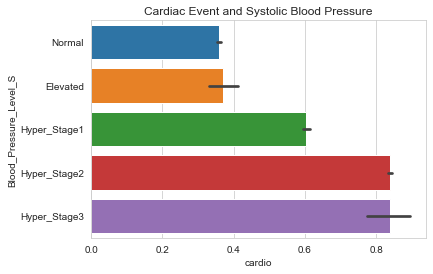

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(x='cardio', y='Blood_Pressure_Level_S', data=df1, saturation=0.8)
plt.title('Cardiac Event and Systolic Blood Pressure')

Text(0.5, 1.0, 'Cardiac Event and Dyastolic Blood Pressure')

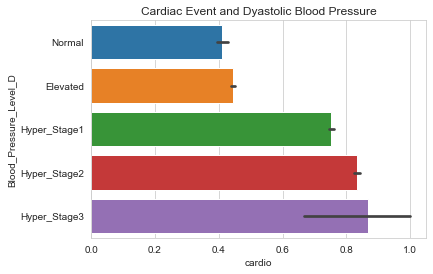

In [19]:
import seaborn as sns

sns.barplot(x='cardio', y='Blood_Pressure_Level_D', data=df1, saturation=0.8)
plt.title('Cardiac Event and Dyastolic Blood Pressure')

Normal blood pressure is below 120/80 mm Hg.If you’re an adult and your systolic pressure is 120 to 129, and your diastolic pressure is less than 80, you have elevated blood pressure. High blood pressure is a systolic pressure of 130
or higher,or a diastolic pressure of 80 or higher, that stays high over time. High blood pressure usually has no signs or symptoms. That’s why it is so dangerous. But it can be managed. Nearly half of the American population over
age 20, has HBP, and many don’t even know it. Not treating high blood pressure is dangerous. High blood pressure increases the risk of heart attack and stroke. Stage 1(systolic BP 130 to 140 and dystolic blood presure more than 80) is more dangerous than just high blood pressure. Stage 2(systolic blood presure more than 140 to 180 and dystolic blood pressure more than 90), more dangerous than stage 1. Stage 3(systolic blood pressure more than 180 and dystolic blood pressure more than 120). Stage 3 is more dangerous than stage 1 and 2. In the graph above you can see how the higher the blood pressure in each of the levels(Normal, high blood pressure, stage1, stage 2, stage 3) the most likely to have a heart event.   

In [20]:
df1['new cholesterol column'] = np.where((df1.cholesterol == 1), "Normal", "High")
df1['new glucose column'] = np.where((df1.gluc == 1), "Normal", "High")
df1['new cholesterol column'] 

1          High
2          High
3        Normal
5          High
6          High
          ...  
69995    Normal
69996      High
69997      High
69998    Normal
69999      High
Name: new cholesterol column, Length: 53053, dtype: object

Text(0.5, 1.0, 'Cardiac Event and Cholesterol')

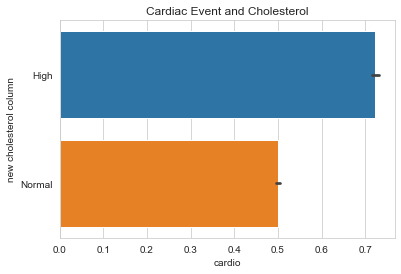

In [21]:
import seaborn as sns

sns.barplot(x='cardio', y='new cholesterol column', data=df1, saturation=0.8)
plt.title('Cardiac Event and Cholesterol')

Text(0.5, 1.0, 'Cardiac Event and Glucose')

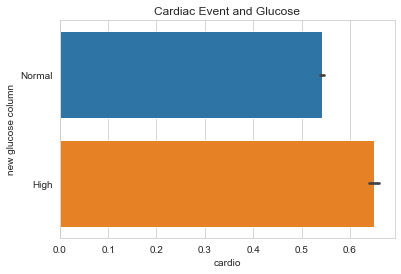

In [22]:
import seaborn as sns

sns.barplot(x='cardio', y='new glucose column', data=df1, saturation=0.8)
plt.title('Cardiac Event and Glucose')

In [23]:
# compute the body mass index based on weight and height
df1['bmi'] = df1['weight'] / (df1['height']/100)**2
# create a BMI group
df1['bmiGrp'] = np.where((df1.bmi < 18.5), 1, 0)
df1['bmiGrp'] = np.where((df1.bmi >= 18.5) & (df1.bmi < 25), 2, df1.bmiGrp)
df1['bmiGrp'] = np.where((df1.bmi >= 25) & (df1.bmi < 30), 3, df1.bmiGrp)
df1['bmiGrp'] = np.where((df1.bmi >= 30), 4, df1.bmiGrp)
# bin blood pressure groups based on the api hi/ lo variables
df1['bp'] = np.where((df1.ap_hi < 120) & (df1.ap_lo < 80), 1, 0)
df1['bp'] = np.where((df1.ap_hi >= 120) & (df1.ap_hi < 130) & (df1.ap_lo < 80), 2, df1.bp)
df1['bp'] = np.where((df1.ap_hi >= 130) & (df1.ap_hi < 140) | ((df1.ap_lo >= 80) & (df1.ap_lo < 90)), 3, df1.bp)
df1['bp'] = np.where((df1.ap_hi >= 140) | (df1.ap_lo >= 90), 4, df1.bp)
df1['bp'] = np.where((df1.ap_hi > 180) | (df1.ap_lo > 120), 5, df1.bp)
df1

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,Blood_Pressure_Level_S,Blood_Pressure_Level_D,new cholesterol column,new glucose column,bmi,bmiGrp,bp
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,Hyper_Stage2,Hyper_Stage1,High,Normal,34.927679,4,4
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,Hyper_Stage1,Normal,High,Normal,23.507805,2,3
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,Hyper_Stage2,Hyper_Stage2,Normal,Normal,28.710479,3,4
5,8,21914,1,151,67.0,120,80,2,2,0,0,0,0,Normal,Elevated,High,High,29.384676,3,3
6,9,22113,1,157,93.0,130,80,3,1,0,0,1,0,Hyper_Stage1,Elevated,High,Normal,37.729725,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,Normal,Elevated,Normal,Normal,26.927438,3,3
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,Hyper_Stage2,Hyper_Stage1,High,High,50.472681,4,4
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,Hyper_Stage2,Hyper_Stage1,High,Normal,31.353579,4,4
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,Hyper_Stage1,Elevated,Normal,High,27.099251,3,3


In [24]:
df1['bp1'] = pd.cut(df1.bp,[0,1,2,3,4,5],5,labels=['Normal','Elevated','Hyper_Stage1','Hyper_Stage2','Hyper_Stage3' ]) # this creates a new variable
df1.bp1
df1['bmiGrp1'] = pd.cut(df1.bmiGrp,[0,1,2,3,4],4,labels=['Under Weight','Normal Weight','Over Weight','Obese' ]) # this creates a new variable
df1.bmiGrp1

1                Obese
2        Normal Weight
3          Over Weight
5          Over Weight
6                Obese
             ...      
69995      Over Weight
69996            Obese
69997            Obese
69998      Over Weight
69999    Normal Weight
Name: bmiGrp1, Length: 53053, dtype: category
Categories (4, object): ['Under Weight' < 'Normal Weight' < 'Over Weight' < 'Obese']

Text(0.5, 1.0, 'Cardiac Event and Blood Pressure')

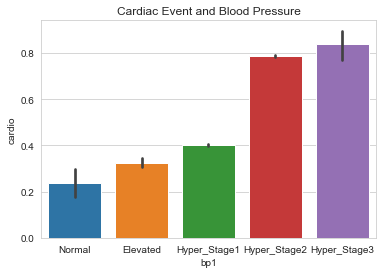

In [25]:
import seaborn as sns

sns.barplot(x='bp1', y='cardio', data=df1, saturation=0.8)
plt.title('Cardiac Event and Blood Pressure')

Text(0.5, 1.0, 'Cardiac Event and BMI')

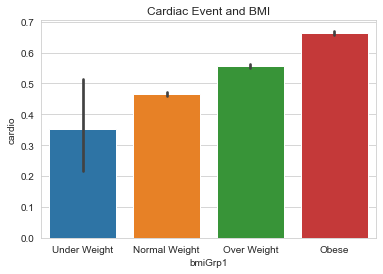

In [26]:
sns.barplot(x='bmiGrp1', y='cardio', data=df1, saturation=0.8)
plt.title('Cardiac Event and BMI')

In [ ]:
#conversion = {1:1, 2:1, 3:2, 4:2, 5:3, 6:3}

#df["newcol"]=0
#for i in range(len(df["newcol"])):
   #key = df["col"][i]
   #df["newcol"][i] = conversion[key]